In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB

from wordcloud import WordCloud, STOPWORDS
    

In [5]:
data = pd.read_csv("PRDECT-ID Dataset.csv")
data

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy
1,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044,5,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy
2,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573,5,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy
3,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy
...,...,...,...,...,...,...,...,...,...,...,...
5395,Household,PCK-01 Penjepit Barang / Pickup Tool Ver.1 Ala...,Jakarta Pusat,35000,4.9,1431,562,5,"Harga bersaing, barang sesuai pesanan. Saya na...",Positive,Love
5396,Household,Ultrasonic Aroma Diffuser Humidifier Colorful ...,Jakarta Utara,99000,4.9,15529,4074,5,Beli ini krn Anak & Istri mau liburan di Jakar...,Positive,Love
5397,Household,Ultrasonic Aroma Diffuser Humidifier Colorful ...,Jakarta Utara,99000,4.9,15529,4074,5,"pengemasan barang baik, kondisi barang jg utuh...",Positive,Happy
5398,Household,Ultrasonic Aroma Diffuser Humidifier Colorful ...,Jakarta Utara,99000,4.9,15529,4074,5,Mungil tapi bekerja dng baik. Dan murahh terja...,Positive,Happy


In [6]:
data.dtypes

Category            object
Product Name        object
Location            object
Price                int64
Overall Rating     float64
Number Sold          int64
Total Review         int64
Customer Rating      int64
Customer Review     object
Sentiment           object
Emotion             object
dtype: object

In [7]:
data.shape

(5400, 11)

In [8]:
data.isnull().sum()

Category           0
Product Name       0
Location           0
Price              0
Overall Rating     0
Number Sold        0
Total Review       0
Customer Rating    0
Customer Review    0
Sentiment          0
Emotion            0
dtype: int64

In [9]:
data.duplicated().sum()
data[data.duplicated(keep=False)]

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
27,Computers and Laptops,cooling pad laptop tahan 24 jam 6.000 Rpm angi...,Kota Surabaya,385000,5.0,2716,1843,5,"mantap kipasnya kenceng, barangnya berkualitas...",Positive,Happy
29,Computers and Laptops,cooling pad laptop tahan 24 jam 6.000 Rpm angi...,Kota Surabaya,385000,5.0,2716,1843,5,"mantap kipasnya kenceng, barangnya berkualitas...",Positive,Happy
70,Computers and Laptops,Usb HUB Vention 4 Port Usb 3.0 2.0 High Speed ...,Jakarta Barat,112000,4.9,14900,7957,1,"tidak berfungsi, tapi yaa sudahlah sudah ditam...",Negative,Sadness
72,Computers and Laptops,Usb HUB Vention 4 Port Usb 3.0 2.0 High Speed ...,Jakarta Barat,112000,4.9,14900,7957,1,"tidak berfungsi, tapi yaa sudahlah sudah ditam...",Negative,Sadness
290,Toys and Hobbies,Kereta Thomas Mainan Thomas,Kota Tangerang,59000,4.7,37200,11900,1,saya belom menerima paket ini kenapa sudah sel...,Negative,Anger
296,Toys and Hobbies,Kereta Thomas Mainan Thomas,Kota Tangerang,59000,4.7,37200,11900,1,saya belom menerima paket ini kenapa sudah sel...,Negative,Anger
720,Office & Stationery,( ISI 30 Roll) Kertas Print Kasir thermal pape...,Kota Tangerang Selatan,58500,4.9,2294,795,5,belanja disini mantap pengiriman cepat dan bar...,Positive,Love
723,Office & Stationery,( ISI 30 Roll) Kertas Print Kasir thermal pape...,Kota Tangerang Selatan,58500,4.9,2294,795,5,belanja disini mantap pengiriman cepat dan bar...,Positive,Love
835,Automotive,Hayaidesu Keychain Gantungan Kunci Aksesoris V...,Jakarta Selatan,25000,4.9,7884,4399,5,Produk sesuai deskripsi??. Variasi produk bera...,Positive,Happy
839,Automotive,Hayaidesu Keychain Gantungan Kunci Aksesoris V...,Jakarta Selatan,25000,4.9,7884,4399,5,Produk sesuai deskripsi??. Variasi produk bera...,Positive,Happy


In [10]:
data = data.drop_duplicates()
data[data.duplicated(keep=False)]
data.duplicated().sum()


np.int64(0)

In [11]:
data.describe(include='object')


,Category,Product Name,Location,Customer Review,Sentiment,Emotion
count,5393,5393,5393,5393,5393,5393
unique,29,1308,61,5305,2,5
top,Food and Drink,Minigold Black Series Logam Mulia Koin Emas Mi...,Jakarta Barat,Kualitas Produk Bagus.,Negative,Happy
freq,200,25,1290,4,2817,1768


In [12]:
data.head()

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy
1,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044,5,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy
2,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573,5,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy
3,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy


In [13]:
data = data.drop(columns=[
    "Product Name", 
    "Location", 
    "Price", 
    "Overall Rating", 
    "Number Sold", 
    "Total Review", 
    "Customer Rating", 
    "Emotion"
])
data.head()

,Category,Customer Review,Sentiment
0,Computers and Laptops,Alhamdulillah berfungsi dengan baik. Packaging...,Positive
1,Computers and Laptops,"barang bagus dan respon cepat, harga bersaing ...",Positive
2,Computers and Laptops,"barang bagus, berfungsi dengan baik, seler ram...",Positive
3,Computers and Laptops,bagus sesuai harapan penjual nya juga ramah. t...,Positive
4,Computers and Laptops,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive


In [14]:
data["Customer Review"] = data["Customer Review"].str.lower()
data.head()

,Category,Customer Review,Sentiment
0,Computers and Laptops,alhamdulillah berfungsi dengan baik. packaging...,Positive
1,Computers and Laptops,"barang bagus dan respon cepat, harga bersaing ...",Positive
2,Computers and Laptops,"barang bagus, berfungsi dengan baik, seler ram...",Positive
3,Computers and Laptops,bagus sesuai harapan penjual nya juga ramah. t...,Positive
4,Computers and Laptops,"barang bagus, pengemasan aman, dapat berfungsi...",Positive


In [15]:
#Stopword
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.StopWordRemover.StopWordRemover import StopWordRemover
from Sastrawi.Dictionary.ArrayDictionary import ArrayDictionary
more_stop_word = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_word_remover_new = StopWordRemover(new_array)

def stopword(str_text):
    str_text = stop_word_remover_new.remove(str_text)
    return str_text

data["Customer Review"] = data["Customer Review"].apply(lambda x: stopword(x))
data.head()


,Category,Customer Review,Sentiment
0,Computers and Laptops,alhamdulillah berfungsi baik. packaging aman. ...,Positive
1,Computers and Laptops,"barang bagus respon cepat, harga bersaing yg l...",Positive
2,Computers and Laptops,"barang bagus, berfungsi baik, seler ramah, pen...",Positive
3,Computers and Laptops,bagus sesuai harapan penjual nya ramah. trimak...,Positive
4,Computers and Laptops,"barang bagus, pengemasan aman, berfungsi baik",Positive


In [16]:
# Tokenisasi
tokenized = data["Customer Review"].apply(lambda x:x.split())
tokenized

0       [alhamdulillah, berfungsi, baik., packaging, a...
1       [barang, bagus, respon, cepat,, harga, bersain...
2       [barang, bagus,, berfungsi, baik,, seler, rama...
3       [bagus, sesuai, harapan, penjual, nya, ramah.,...
4       [barang, bagus,, pengemasan, aman,, berfungsi,...
                              ...                        
5395    [harga, bersaing,, barang, sesuai, pesanan., n...
5396    [beli, krn, anak, &, istri, mau, liburan, jaka...
5397    [pengemasan, barang, baik,, kondisi, barang, j...
5398    [mungil, bekerja, dng, baik., murahh, terjangk...
5399    [produk, sesuai, deskripsi,, packing, aman, te...
Name: Customer Review, Length: 5393, dtype: object

In [61]:
#Steamming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm import tqdm

# Integrasikan tqdm ke pandas
tqdm.pandas()

# Fungsi stemming
def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in str(text_cleaning).split():  # pastikan tipe data string
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = " ".join(do)
    return d_clean

tokenized = data["Customer Review"].progress_apply(stemming)

# Simpan hasil ke CSV
tokenized.to_csv("dataset_stemming.csv", index=False)

100%|████████████████████████████████████████████████████████████████████████████| 5393/5393 [3:50:14<00:00,  2.56s/it]


In [84]:
data_clean = pd.read_csv("dataset_stemming.csv")
data_clean.head()

,Customer Review
0,alhamdulillah fungsi baik packaging aman respo...
1,barang bagus respon cepat harga saing yg lain
2,barang bagus fungsi baik seler ramah kirim cepat
3,bagus sesuai harap jual nya ramah trimakasih l...
4,barang bagus emas aman fungsi baik


In [85]:
att1 = data['Category']
att2 = data['Sentiment']

data_clean = pd.concat([data_clean, att1, att2], axis=1)
data_clean

,Customer Review,Category,Sentiment
0,alhamdulillah fungsi baik packaging aman respo...,Computers and Laptops,Positive
1,barang bagus respon cepat harga saing yg lain,Computers and Laptops,Positive
2,barang bagus fungsi baik seler ramah kirim cepat,Computers and Laptops,Positive
3,bagus sesuai harap jual nya ramah trimakasih l...,Computers and Laptops,Positive
4,barang bagus emas aman fungsi baik,Computers and Laptops,Positive
...,...,...,...
5395,NaN,Household,Positive
5396,NaN,Household,Positive
5397,NaN,Household,Positive
5398,NaN,Household,Positive


In [86]:
data_clean.duplicated().sum()
data_clean.isnull().sum()

Customer Review    7
Category           7
Sentiment          7
dtype: int64

In [87]:
data_clean = data_clean.dropna()
data_clean.isnull().sum()

Customer Review    0
Category           0
Sentiment          0
dtype: int64

In [88]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data_clean["Sentiment"] = data_clean["Sentiment"].replace({"Positive": 1, "Negative": 0}).astype(int)
data_clean["Category"] = encoder.fit_transform(data_clean["Category"])

data_clean.head()

C:\Users\Daffa Lintang\AppData\Local\Temp\ipykernel_23144\3143421917.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_clean["Sentiment"] = data_clean["Sentiment"].replace({"Positive": 1, "Negative": 0}).astype(int)
C:\Users\Daffa Lintang\AppData\Local\Temp\ipykernel_23144\3143421917.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean["Sentiment"] = data_clean["Sentiment"].replace({"Positive": 1, "Negative": 0}).astype(int)
C:\Users\Daffa Lintang\AppData\Local\Temp\ipykernel_23144\3143421917.py:5: Set

,Customer Review,Category,Sentiment
0,alhamdulillah fungsi baik packaging aman respo...,7,1
1,barang bagus respon cepat harga saing yg lain,7,1
2,barang bagus fungsi baik seler ramah kirim cepat,7,1
3,bagus sesuai harap jual nya ramah trimakasih l...,7,1
4,barang bagus emas aman fungsi baik,7,1


In [89]:
data_negatif = data_clean[data_clean["Sentiment"] == 0]
data_positif = data_clean[data_clean["Sentiment"] == 1]

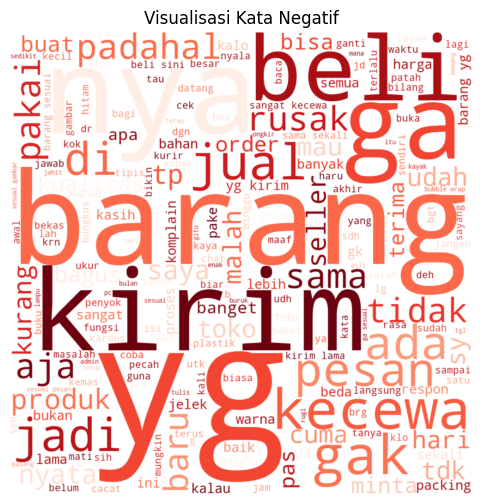

In [90]:
all_text_s0 = ' '.join(word for word in data_negatif["Customer Review"])
wordCloud = WordCloud(colormap="Reds", width=1000, height=1000, mode="RGBA", background_color="white").generate(all_text_s0)
plt.figure(figsize=(9, 6))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.title('Visualisasi Kata Negatif')
plt.margins(x=0, y=0)
plt.show()

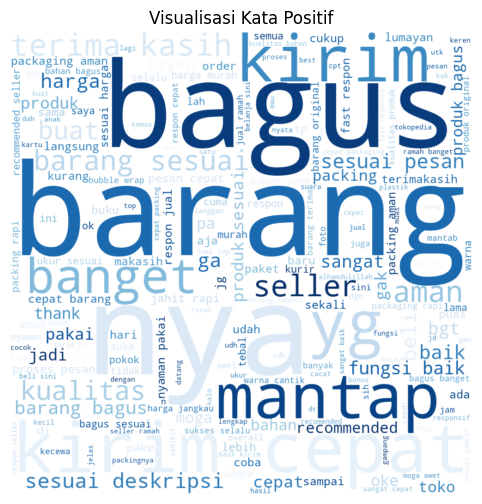

In [91]:
all_text_s1 = ' '.join(word for word in data_positif["Customer Review"])
wordCloud = WordCloud(colormap="Blues", width=1000, height=1000, mode="RGBA", background_color="white").generate(all_text_s1)
plt.figure(figsize=(9, 6))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.title('Visualisasi Kata Positif')
plt.margins(x=0, y=0)
plt.show()

In [92]:
data_clean["Sentiment"].value_counts()

Sentiment
0    2817
1    2569
Name: count, dtype: int64

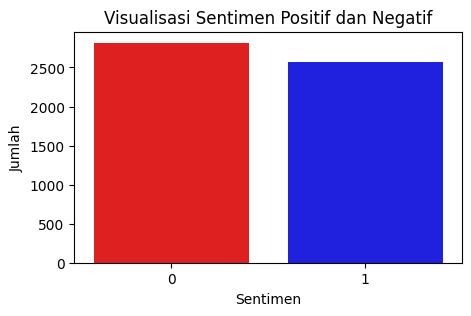

In [93]:
#Visualisasi sentimen positif dan negatif
plt.figure(figsize=(5, 3))
sns.countplot(data=data_clean, x='Sentiment', hue='Sentiment', palette={0: "red", 1: "blue"}, legend=False)
plt.title('Visualisasi Sentimen Positif dan Negatif')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

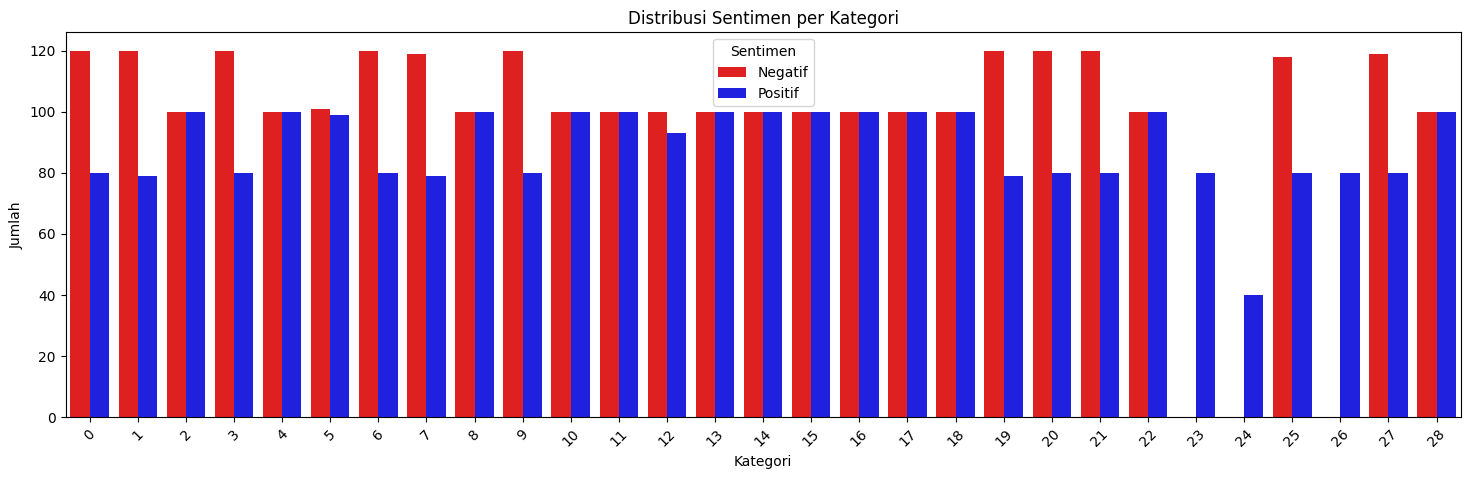

In [94]:
#Sentimen per kategori
plt.figure(figsize=(18, 5))
sns.countplot(data=data_clean, x='Category', hue='Sentiment', palette={0: "red", 1: "blue"})
plt.title('Distribusi Sentimen per Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.legend(title='Sentimen', labels=['Negatif', 'Positif'])
plt.xticks(rotation=45)
plt.show()


In [95]:
data_clean["Category"].nunique()


29

In [96]:
# Kategori yang hanya punya sentimen positif
only_positive = data_clean.groupby('Category')['Sentiment'].apply(lambda x: set(x) == {1})
only_positive_categories = only_positive[only_positive].index.tolist()

print("Kategori tanpa sentimen negatif:", only_positive_categories)


Kategori tanpa sentimen negatif: [23, 24, 26]


In [98]:
from sklearn.utils import resample

# Ambil data negatif dari kategori lain
negative_other = data_clean[(data_clean['Sentiment'] == 0) & (~data_clean['Category'].isin([23, 24, 26]))]

# Kategori yang tidak punya sentimen negatif
target_categories = [23, 24, 26]

synthetic_list = []

for category in target_categories:
    # Hitung jumlah data positif di kategori tersebut
    n_target = len(data_clean[data_clean['Category'] == category])
    
    if n_target == 0:
        print(f"⚠️ Tidak ditemukan data untuk kategori {category}, dilewati.")
        continue
    
    # Oversample data negatif dari kategori lain
    negative_synthetic = resample(
        negative_other,
        replace=True,
        n_samples=n_target,  # jumlah data negatif sintetis = jumlah data positif
        random_state=42
    )
    
    # Ubah kategorinya menjadi kategori target
    negative_synthetic['Category'] = category
    
    # Tambahkan ke list
    synthetic_list.append(negative_synthetic)

# Gabungkan semua hasil sintetis
all_synthetic = pd.concat(synthetic_list, ignore_index=True)

# Gabungkan dengan dataset asli
data_augmented = pd.concat([data_clean, all_synthetic], ignore_index=True)

print("✅ Oversampling selesai!")
print("Ukuran data asli :", len(data_clean))
print("Ukuran data baru  :", len(data_augmented))


✅ Oversampling selesai!
Ukuran data asli : 5386
Ukuran data baru  : 5586


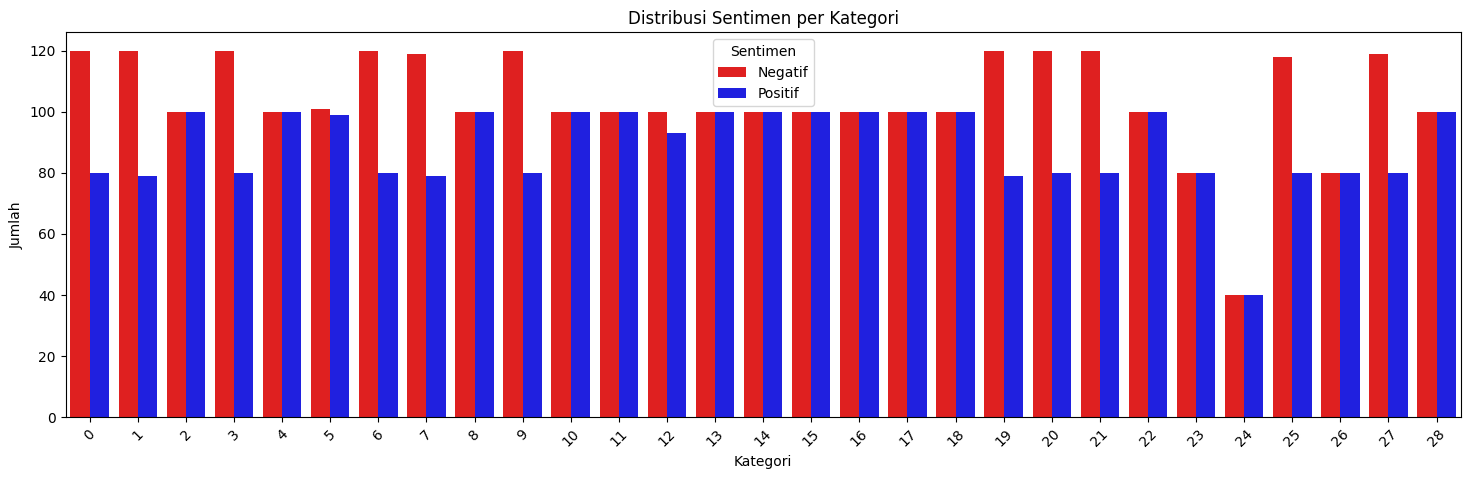

In [99]:
#Sentimen per kategori
plt.figure(figsize=(18, 5))
sns.countplot(data=data_augmented, x='Category', hue='Sentiment', palette={0: "red", 1: "blue"})
plt.title('Distribusi Sentimen per Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.legend(title='Sentimen', labels=['Negatif', 'Positif'])
plt.xticks(rotation=45)
plt.show()


In [100]:
data_augmented

,Customer Review,Category,Sentiment
0,alhamdulillah fungsi baik packaging aman respo...,7,1
1,barang bagus respon cepat harga saing yg lain,7,1
2,barang bagus fungsi baik seler ramah kirim cepat,7,1
3,bagus sesuai harap jual nya ramah trimakasih l...,7,1
4,barang bagus emas aman fungsi baik,7,1
...,...,...,...
5581,barang gak pakai parah mah,26,0
5582,udah 2x beli ga awet banget yg pertama rusak r...,26,0
5583,minta warna hitam doff malah kirim warna warni...,26,0
5584,free canister ga kirim payah kecewah dah males...,26,0


In [102]:
X = data_augmented[['Customer Review', 'Category']]
y = data_augmented['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [104]:
vectorizer = CountVectorizer()
x_train_vec =vectorizer.fit_transform(X_train['Customer Review'])
x_test_vec =vectorizer.transform(X_test['Customer Review'])

In [107]:
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train_vec, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [108]:
y_pred = naive_bayes.predict(x_test_vec)

In [109]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.872093023255814

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.88      0.87      0.87       572
     Positif       0.87      0.87      0.87       546

    accuracy                           0.87      1118
   macro avg       0.87      0.87      0.87      1118
weighted avg       0.87      0.87      0.87      1118

